# TFG - Fórmula 1 - ML

Autor: Manuel Ventura Pacheco

Obtener archivos con los embeddings de los modelos para mostrar en la herramienta [Embedding Projector](https://projector.tensorflow.org/) de Tensorflow.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, Dropout, Input, Flatten, BatchNormalization, concatenate, AlphaDropout

from google.colab import drive

import io
import os
import re
import shutil

## Read files

In [ ]:
read_dir = '/content/drive/MyDrive/Universidad/TFG/data_ready/'
save_dir = '/content/drive/MyDrive/Universidad/TFG/models/'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model(save_dir+'nn_model_categorical_nolookup.h5')
df = pd.read_csv(read_dir+'LEARNING_DF_NORMAL.csv')
df = df.loc[df['year'] >= 2000].copy()
drivers = pd.read_csv(read_dir+'drivers.csv')
drivers['fullName'] = drivers['forename'] + drivers['surname']
constructors = pd.read_csv(read_dir+'constructors.csv')
circuits = pd.read_csv(read_dir+'circuits.csv')

## Prepare data

In [ ]:
driverIds = set(df['driverId'])
constructorIds = set(df['constructorId'])
circuitIds = set(df['circuitId'])

In [ ]:
drivers = drivers.drop(['driverRef', 'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url'], axis=1)
constructors = constructors.drop(['constructorRef', 'nationality', 'url'], axis=1)
circuits = circuits.drop(['circuitRef', 'location', 'country', 'lat', 'lng', 'alt', 'url'], axis=1)

In [ ]:
drivers = drivers[drivers['driverId'].isin(driverIds)]
constructors = constructors[constructors['constructorId'].isin(constructorIds)]
circuits = circuits[circuits['circuitId'].isin(circuitIds)]

In [ ]:
for index, row in drivers.iterrows():
  print(row[0],row[1])

1 LewisHamilton
2 NickHeidfeld
3 NicoRosberg
4 FernandoAlonso
5 HeikkiKovalainen
6 KazukiNakajima
7 SébastienBourdais
8 KimiRäikkönen
9 RobertKubica
10 TimoGlock
11 TakumaSato
12 NelsonPiquet Jr.
13 FelipeMassa
14 DavidCoulthard
15 JarnoTrulli
16 AdrianSutil
17 MarkWebber
18 JensonButton
19 AnthonyDavidson
20 SebastianVettel
21 GiancarloFisichella
22 RubensBarrichello
23 RalfSchumacher
24 VitantonioLiuzzi
25 AlexanderWurz
26 ScottSpeed
27 ChristijanAlbers
28 MarkusWinkelhock
29 SakonYamamoto
30 MichaelSchumacher
31 JuanPablo Montoya
32 ChristianKlien
33 TiagoMonteiro
34 YujiIde
35 JacquesVilleneuve
36 FranckMontagny
37 Pedrode la Rosa
38 RobertDoornbos
39 NarainKarthikeyan
40 PatrickFriesacher
41 RicardoZonta
42 AntônioPizzonia
43 Cristianoda Matta
44 OlivierPanis
45 GiorgioPantano
46 GianmariaBruni
47 ZsoltBaumgartner
48 MarcGené
49 Heinz-HaraldFrentzen
50 JosVerstappen
51 JustinWilson
52 RalphFirman
53 NicolasKiesa
54 LucianoBurti
55 JeanAlesi
56 EddieIrvine
57 MikaHäkkinen
58 TarsoM

## Obtain embeddings

In [ ]:
driver_embedding = model.get_layer('Driver_Embeddding').get_weights()[0]
constructor_embedding = model.get_layer('Constructor_Embedding').get_weights()[0]
circuit_embedding = model.get_layer('Circuit_Embedding').get_weights()[0]

In [ ]:
# Driver embeddings
out_v = io.open('driver_vectors_cat_nolookup.tsv', 'w', encoding='utf-8')
out_m = io.open('driver_metadata_cat_nolookup.tsv', 'w', encoding='utf-8')

for index_df, row in drivers.iterrows():
  index = row[0]
  name = row[1]
  if index == 0:
    continue  # skip 0, it's padding.
  vec = driver_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(name + "\n")
out_v.close()
out_m.close()


In [ ]:
# Constructor embeddings
out_v = io.open('constructor_vectors_cat_nolookup.tsv', 'w', encoding='utf-8')
out_m = io.open('constructor_metadata_cat_nolookup.tsv', 'w', encoding='utf-8')

for index_df, row in constructors.iterrows():
  index = row[0]
  name = row[1]
  if index == 0:
    continue  # skip 0, it's padding.
  vec = driver_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(name + "\n")
out_v.close()
out_m.close()

In [ ]:
# Circuit embeddings
out_v = io.open('circuit_vectors_cat_nolookup.tsv', 'w', encoding='utf-8')
out_m = io.open('circuit_metadata_cat_nolookup.tsv', 'w', encoding='utf-8')

for index_df, row in circuits.iterrows():
  index = row[0]
  name = row[1]
  if index == 0:
    continue  # skip 0, it's padding.
  vec = driver_embedding[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(name + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  for file_vec in ['driver_vectors_cat_nolookup.tsv', 'driver_metadata_cat_nolookup.tsv',
                   'constructor_vectors_cat_nolookup.tsv', 'constructor_metadata_cat_nolookup.tsv',
                   'circuit_vectors_cat_nolookup.tsv', 'circuit_metadata_cat_nolookup.tsv']:
    files.download(file_vec)
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

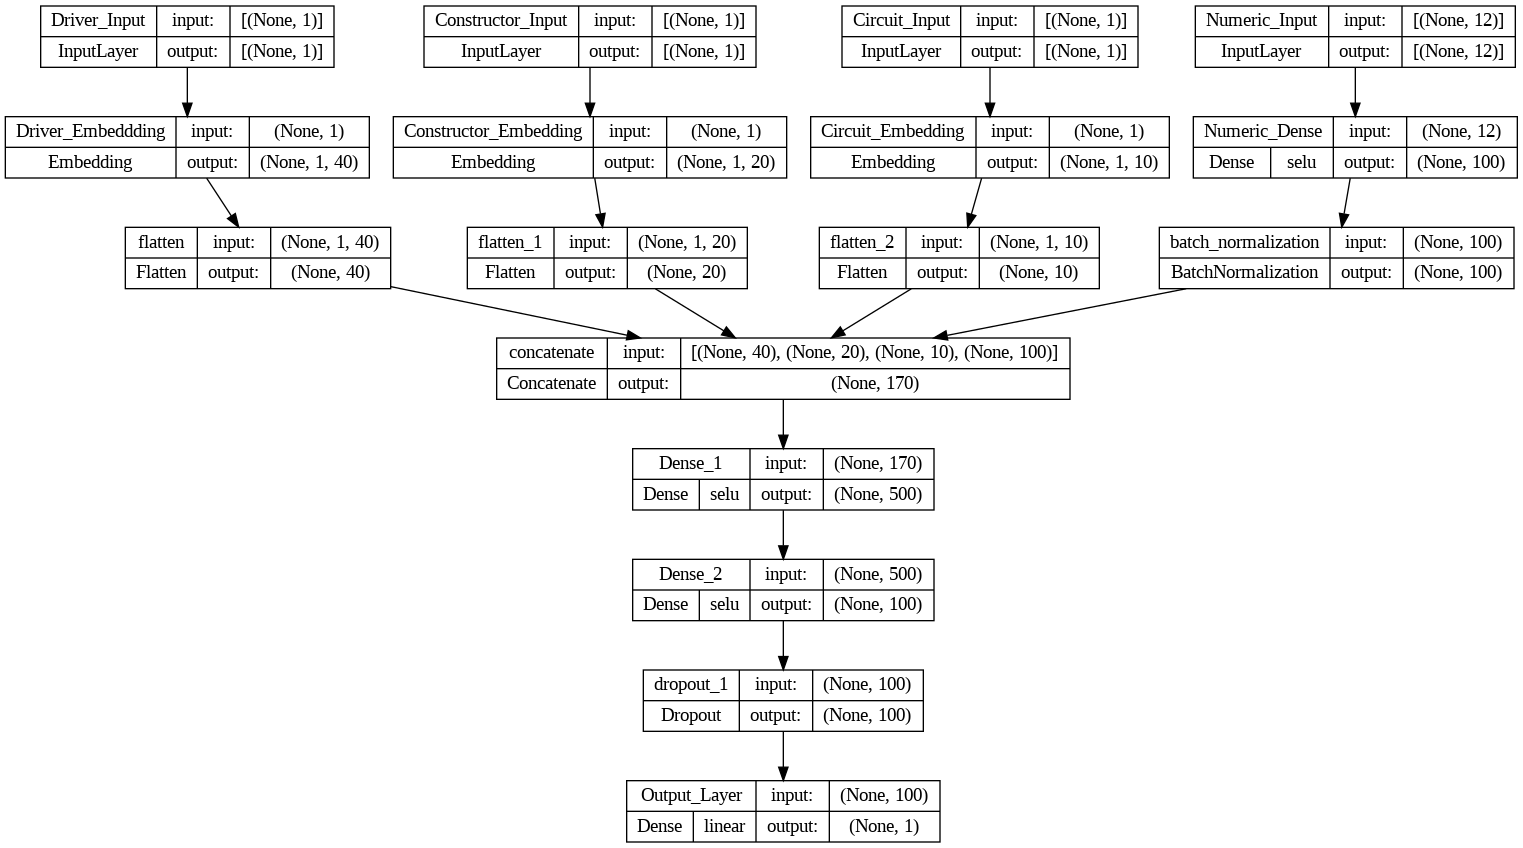

In [ ]:
keras.utils.plot_model(model,
                       show_shapes=True,
                       show_layer_activations=True)